<h1 align="center"><font size="5">Supervised Machine Learning: Regression by Nikhil</font></h1>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pickle

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

## Dataset obtained from kaggle: **Laptop Price Prediction**

In [2]:
data = pd.read_csv('Cleaned_Laptop_data.csv')

# 1. About the Data


In [3]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

<Axes: xlabel='latest_price', ylabel='Count'>

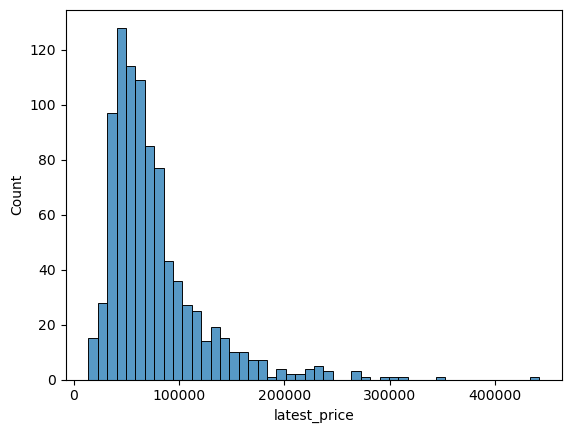

In [5]:
sns.histplot(data['latest_price'])

The Laptop Dataset contains 23 features/attributes and 896 records. Since only one dataset is given, we can use this data for training and testing the model. Let's explore through the features of the Dataset.

    brand: Manufacturer of Laptop.
    model: Model name of the Laptop.
    processor_brand: Manufacturer of the Processor.
    processor_name: An integral part of the laptop, the processor will determine how powerful your computer is.
    processor_gnrtn: A geneartion is a group of processors that were launched in some particular years and had significant improvements from processors launched earlier.
    ram_gb: The storage size of ram in GB(Giga Bytes)
    ram_type: The type of RAM used. This feature contains values such as-DDR4,LPDDR4X,LPDDR4,LPDDR3,DDR3,DDR5
    ssd : The storage size of SSD.
    hdd : The storage size of Hard Disk used .
    os : Operating system such as Windows, DOS, Mac.
    os_bit : OS Bit with values as 64 bit, 32 bit.
    graphic_card_gb : The size of graphic card used in the Laptop.
    weight : The type of Laptop based on weight. This feature contains values such as- Casual, ThinNlight, Gaming
    display_size : Display size in inches .
    warranty : Warranty in no. of years .
    Touchscreen : This feature reveals whether the Laptop has touchscreen feature or not.
    msoffice : This feature reveals whether the Laptop has MS Office installed or not.
    old_price : Price of the Laptop when it was released.
    discount : Discount percentage for price available for the laptop.
    star_rating : User rating for the laptop with max rating as 5.0
    ratings : Total no. of ratings received for the Laptop model.
    reviews : No. of reviews received for the Laptop model.


# 2. Objectives


- Studying the features of the data sample.
- Doing Feature Engineering and EDA
- Data preprocessing for Regression analysis
- Prediction using Linear Regression
- Comparison between different regression techniques

In [6]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [7]:
data.shape

(896, 23)

In [8]:
data.duplicated().sum()

20

In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

In [11]:
for column in data.columns:
    print(column,(data[column]=='Missing').sum())

brand 0
model 95
processor_brand 0
processor_name 0
processor_gnrtn 238
ram_gb 0
ram_type 0
ssd 0
hdd 0
os 0
os_bit 0
graphic_card_gb 0
weight 0
display_size 328
warranty 0
Touchscreen 0
msoffice 0
latest_price 0
old_price 0
discount 0
star_rating 0
ratings 0
reviews 0


Replacing "Missing" value with NaN

In [12]:
data_eda = data.replace('Missing', np.nan)

In [13]:
#To print the categorical columns in the Laptop dataset 

category_columns=list(data_eda.select_dtypes(include=['object']).columns)
print(category_columns)
print("\nNo. of Category Columns : ",len(category_columns))


['brand', 'model', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'weight', 'display_size', 'Touchscreen', 'msoffice']

No. of Category Columns :  15


In [14]:
data_eda.brand.unique()

array(['Lenovo', 'Avita', 'HP', 'acer', 'ASUS', 'DELL', 'RedmiBook',
       'realme', 'Infinix', 'MSI', 'lenovo', 'MICROSOFT', 'Smartron',
       'LG', 'Nokia', 'APPLE', 'Vaio', 'Mi', 'ALIENWARE', 'iball',
       'SAMSUNG'], dtype=object)

In [15]:
#Capitalizing all the categorical columns inorder to remove duplicated values in columns
for col in category_columns:
    data_eda[col]=data_eda[col].str.capitalize()

In [16]:
data_eda.brand.unique()

array(['Lenovo', 'Avita', 'Hp', 'Acer', 'Asus', 'Dell', 'Redmibook',
       'Realme', 'Infinix', 'Msi', 'Microsoft', 'Smartron', 'Lg', 'Nokia',
       'Apple', 'Vaio', 'Mi', 'Alienware', 'Iball', 'Samsung'],
      dtype=object)

While Performing the EDA we have noticed some issues in the dataset and have done some preprocessing actions in that stage itself .

The different preprocessing steps which are already done are -

    Capitalizing all the categorical columns inorder to remove duplicated values in columns

    Replacing the missing values with NaN.

In [17]:
#Creating a checkpoint
temp_data = data_eda.copy()
temp_data.shape

(876, 23)

In [18]:
temp_data.isnull().sum()

brand                0
model               95
processor_brand      0
processor_name       0
processor_gnrtn    238
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
display_size       328
warranty             0
Touchscreen          0
msoffice             0
latest_price         0
old_price            0
discount             0
star_rating          0
ratings              0
reviews              0
dtype: int64

In [19]:
def get_numerical_summary(df):
    total = temp_data.shape[0]
    missing_columns = [
        col for col in temp_data.columns
        if df[col].isnull().sum() > 0
    ]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count / total) * 100
        missing_percent[col] = per
    return missing_percent

In [20]:
get_numerical_summary(temp_data)

{'model': 10.844748858447488,
 'processor_gnrtn': 27.168949771689498,
 'display_size': 37.44292237442922}

In [21]:
data_dropped=temp_data.drop(['display_size'],axis=1)

In [22]:
data_for_arb_imp=data_dropped.copy()

In [23]:
#We can replace these null values with an Arbitrary value "Unknown"
arb_imputed = data_for_arb_imp.fillna("Unknown")

## Categorical Encoding

In [24]:
df=arb_imputed.copy()

The features like ram_gb,ssd,hdd,os_bit has numerical values in it.

So instead of encoding we can directly convert the data type of these columns and provide the same numerical values present in it for modelling .

In [25]:
df['ram_gb']=df['ram_gb'].str.replace('gb','')
df['ram_gb']=pd.to_numeric(df['ram_gb'])

df['ssd']=df['ssd'].str.replace('gb','')
df['ssd']=pd.to_numeric(df['ssd'])

df['hdd']=df['hdd'].str.replace('gb','')
df['hdd']=pd.to_numeric(df['hdd'])

df['os_bit']=df['os_bit'].str.replace('-bit','')
df['os_bit']=pd.to_numeric(df['os_bit'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 895
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            876 non-null    object 
 1   model            876 non-null    object 
 2   processor_brand  876 non-null    object 
 3   processor_name   876 non-null    object 
 4   processor_gnrtn  876 non-null    object 
 5   ram_gb           876 non-null    int64  
 6   ram_type         876 non-null    object 
 7   ssd              876 non-null    int64  
 8   hdd              876 non-null    int64  
 9   os               876 non-null    object 
 10  os_bit           876 non-null    int64  
 11  graphic_card_gb  876 non-null    int64  
 12  weight           876 non-null    object 
 13  warranty         876 non-null    int64  
 14  Touchscreen      876 non-null    object 
 15  msoffice         876 non-null    object 
 16  latest_price     876 non-null    int64  
 17  old_price        876 

The nominal categorical features in our dataset are- brand, model, processor_brand, processor_name, os, weight.
So let's one hot encode these features.

In [26]:
#Let's create a dataframe for these nominal categorical features
df_nominal=df[['brand','model','processor_brand','processor_name','os','weight']].copy()
df_nominal

,brand,model,processor_brand,processor_name,os,weight
0,Lenovo,A6-9225,Amd,A6-9225 processor,Windows,Thinnlight
1,Lenovo,Ideapad,Amd,Apu dual,Windows,Casual
2,Avita,Pura,Amd,Apu dual,Windows,Thinnlight
3,Avita,Pura,Amd,Apu dual,Windows,Thinnlight
4,Avita,Pura,Amd,Apu dual,Windows,Thinnlight
...,...,...,...,...,...,...
891,Asus,Rog,Amd,Ryzen 9,Windows,Casual
892,Asus,Ryzen,Amd,Ryzen 9,Windows,Casual
893,Asus,Ryzen,Amd,Ryzen 9,Windows,Casual
894,Samsung,Galaxy,Qualcomm,Snapdragon 7c,Windows,Casual


In [27]:
dummy_Data=pd.get_dummies(df_nominal)
dummy_Data.columns.values

array(['brand_Acer', 'brand_Alienware', 'brand_Apple', 'brand_Asus',
       'brand_Avita', 'brand_Dell', 'brand_Hp', 'brand_Iball',
       'brand_Infinix', 'brand_Lenovo', 'brand_Lg', 'brand_Mi',
       'brand_Microsoft', 'brand_Msi', 'brand_Nokia', 'brand_Realme',
       'brand_Redmibook', 'brand_Samsung', 'brand_Smartron', 'brand_Vaio',
       'model_14a', 'model_14s', 'model_15', 'model_15-ec1105ax',
       'model_15q', 'model_15s', 'model_250', 'model_250-g6',
       'model_3000', 'model_3511', 'model_430', 'model_A6-9225',
       'model_Alpha', 'model_Amd', 'model_Apu', 'model_Aspire',
       'model_Asus', 'model_Athlon', 'model_B50-70', 'model_Book',
       'model_Book(slim)', 'model_Bravo', 'model_Celeron',
       'model_Chromebook', 'model_Commercial', 'model_Compbook',
       'model_Conceptd', 'model_Cosmos', 'model_Creator', 'model_Da',
       'model_Dell', 'model_Delta', 'model_Dual', 'model_E',
       'model_Eeebook', 'model_Envy', 'model_Expertbook', 'model_Extensa',
     

In [28]:
#Shape of one hot encoded features
dummy_Data.shape

(876, 165)

In [29]:
#Concatenating the one hot encoded dummy dataset to the original dataset.
df2 = pd.concat([df,dummy_Data], axis=1)
# df2

In [30]:
#Removing the original features since we have created their dummy features.
df = df2.drop(['brand','model','processor_brand','processor_name','os','weight'], axis=1)

In [31]:
#Viewing the columns
df.columns.values

array(['processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os_bit',
       'graphic_card_gb', 'warranty', 'Touchscreen', 'msoffice',
       'latest_price', 'old_price', 'discount', 'star_rating', 'ratings',
       'reviews', 'brand_Acer', 'brand_Alienware', 'brand_Apple',
       'brand_Asus', 'brand_Avita', 'brand_Dell', 'brand_Hp',
       'brand_Iball', 'brand_Infinix', 'brand_Lenovo', 'brand_Lg',
       'brand_Mi', 'brand_Microsoft', 'brand_Msi', 'brand_Nokia',
       'brand_Realme', 'brand_Redmibook', 'brand_Samsung',
       'brand_Smartron', 'brand_Vaio', 'model_14a', 'model_14s',
       'model_15', 'model_15-ec1105ax', 'model_15q', 'model_15s',
       'model_250', 'model_250-g6', 'model_3000', 'model_3511',
       'model_430', 'model_A6-9225', 'model_Alpha', 'model_Amd',
       'model_Apu', 'model_Aspire', 'model_Asus', 'model_Athlon',
       'model_B50-70', 'model_Book', 'model_Book(slim)', 'model_Bravo',
       'model_Celeron', 'model_Chromebook', 'model_Commercial',
       

In [32]:
#Now, let's do custom mapping of the ordinal features based upon some domain factors.
#The ordinal features are processor_gnrtn,ram_type,Touchscreen,msoffice             

custom_mapping={'processor_gnrtn':{'4th':0,'7th':1,'8th':2,'Unknown':3,'9th':4,'10th':5,'11th':6,'12th':7},
                'ram_type':{'Ddr3':0,'Lpddr3':1,'Ddr4':2,'Lpddr4':3,'Lpddr4x':4,'Ddr5':5},
               'Touchscreen':{'No':0,'Yes':1},
                'msoffice':{'No':0,'Yes':1}}
df.replace(custom_mapping,inplace=True)
# df

In [33]:
processed_data=df.copy()

In [34]:
processed_data.shape

(876, 181)

# 3. Linear Regression Models


In [35]:
processed_df=processed_data.copy()

In [36]:
# Let's transform 'latest_price' with a log transformation
X = processed_df['latest_price']

# The inputs are everything but the dependent variable, so we can simply drop it
y = processed_df.drop(['latest_price'],axis=1)

## 1. Simple Linear Regression after log transforming of the target variable  

In [37]:
# Let's transform 'latest_price' with a log transformation
targets = np.log(X)

inputs = y

In [38]:
# inputs.columns.values

In [39]:
#Viewing the targets and inputs shape
targets.shape, inputs.shape

((876,), (876, 180))

## Train - Test Split

In [40]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 75-25 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
# Fit the regression with the TRAIN inputs and targets
lr.fit(x_train,y_train)

LinearRegression()

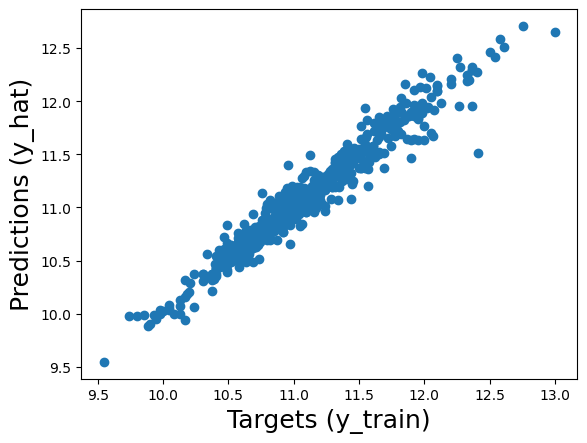

In [42]:
# Let's check the outputs of the regression
y_pred = lr.predict(x_train)

# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_pred)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

/tmp/ipykernel_6242/3812493462.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_pred)


Text(0.5, 1.0, 'Residuals PDF')

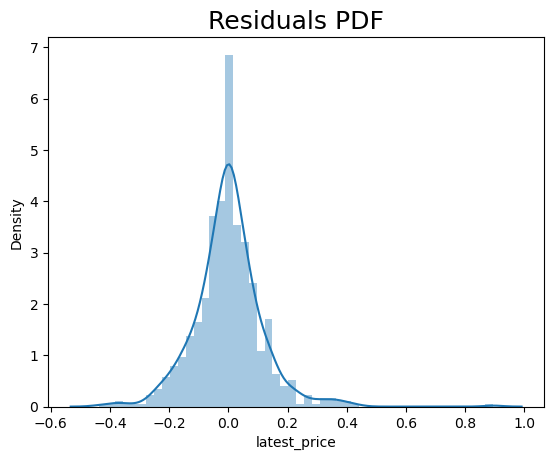

In [43]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_pred)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed

In [44]:
lr.score(x_train, y_train)

0.9499421736568339

In [45]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Our test inputs are 'x_test', while the outputs: 'y_test'
y_hat_test = lr.predict(x_test)

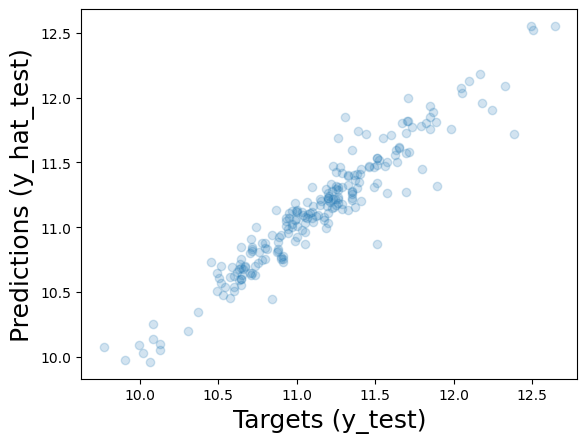

In [46]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [47]:
#Find the R-squared of the model predictions
lr.score(x_test,y_test)

0.9094017103788405

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#printing the r2 score and mean absolute error
print("R2 score: %.2f"%(r2_score(y_test,y_hat_test)))
mae = mean_absolute_error(y_test, y_hat_test)
print("MAE : ", mae)

R2 score: 0.91
MAE :  0.10313801151809042


In [49]:
y_test = y_test.reset_index(drop=True)
# Finally, let's manually check these predictions by creating a dataframe
# To obtain the actual prices, we take the exponential of the log_price
df = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df['Target'] = np.exp(y_test)
# Additionally, we can calculate the difference between the targets and the predictions
df['Residual'] = df['Target'] - df['Prediction']
# Here, we take the absolute difference in %, so we can easily order the data frame
df['Difference%'] = np.absolute(df['Residual']/df['Target']*100)
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
171,83017.76,82990.00,-27.76,0.03
33,100894.65,100990.00,95.35,0.09
39,95144.12,94990.00,-154.12,0.16
161,140428.96,139990.00,-438.96,0.31
172,64190.69,63990.00,-200.69,0.31
...,...,...,...,...
143,82122.52,145990.00,63867.48,43.75
136,52579.87,99990.00,47410.13,47.41
83,122780.73,239759.00,116978.27,48.79
208,119601.45,77890.00,-41711.45,53.55


## 2. Linear Regression after splitting the sample using KFold

In [54]:
X = processed_df.drop('latest_price', axis=1)
y = processed_df.latest_price

In [55]:
y

0       24990
1       19590
2       19990
3       21490
4       24990
        ...  
891    144990
892    149990
893    142990
894     38990
895     57490
Name: latest_price, Length: 876, dtype: int64

In [56]:
X.shape , y.shape

((876, 180), (876,))

In [57]:
# y = y.values.reshape((876, 1))

In [58]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [59]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 2  3  5  7  8  9 10 11 13 14] 584
Test index: [ 0  1  4  6 12 16 17 23 25 26] 292

Train index: [ 0  1  3  4  5  6  7  8 10 11] 584
Test index: [ 2  9 15 19 24 27 29 30 31 34] 292

Train index: [ 0  1  2  4  6  9 12 15 16 17] 584
Test index: [ 3  5  7  8 10 11 13 14 18 20] 292



In [60]:
#from sklearn.metrics import r2_score, mean_squared_error

scores = []
lr = LinearRegression()
s = StandardScaler()

In [61]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.reset_index(drop=True).iloc[train_index], y.reset_index(drop=True).iloc[test_index]
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
# scores

## Using Pipelines

In [62]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [63]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [64]:
r2_score(y, predictions)

-3.7964997470675886e+25

In [65]:
# print(lr.coef_)

In [66]:
alphas = np.geomspace(100, 350, num=20)
alphas

array([100.        , 106.81571705, 114.09597408, 121.87243284,
       130.17891302, 139.05153939, 148.52889886, 158.65220835,
       169.46549396, 181.01578252, 193.35330607, 206.53172031,
       220.60833798, 235.64437808, 251.70523213, 268.86074855,
       287.18553642, 306.75928998, 327.66713521, 350.        ])

## 3. Lasso Regression

In [67]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=1000000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [68]:
list(zip(alphas,scores))

[(100.0, 0.8134871605229823),
 (106.81571704772026, 0.8136994042477189),
 (114.09597408418622, 0.8138908201684963),
 (121.87243284060459, 0.8140941788968177),
 (130.17891302219294, 0.8142752269974821),
 (139.05153938958347, 0.8144464056258504),
 (148.52889886487674, 0.8146039160520486),
 (158.65220834560117, 0.8147470981274155),
 (169.46549395639693, 0.8148758286453767),
 (181.01578251798622, 0.8149675792214641),
 (193.35330606612882, 0.8150242500666869),
 (206.53172031000847, 0.8150412050659717),
 (220.60833798012763, 0.8149734949477385),
 (235.64437808053123, 0.8148263662519366),
 (251.70523212936035, 0.8146444872590195),
 (268.860748545605, 0.8144230516710755),
 (287.1855364188558, 0.8141813587723644),
 (306.7592899831426, 0.8138857178386808),
 (327.66713520598887, 0.8135301518673506),
 (350.0, 0.8131253313637813)]

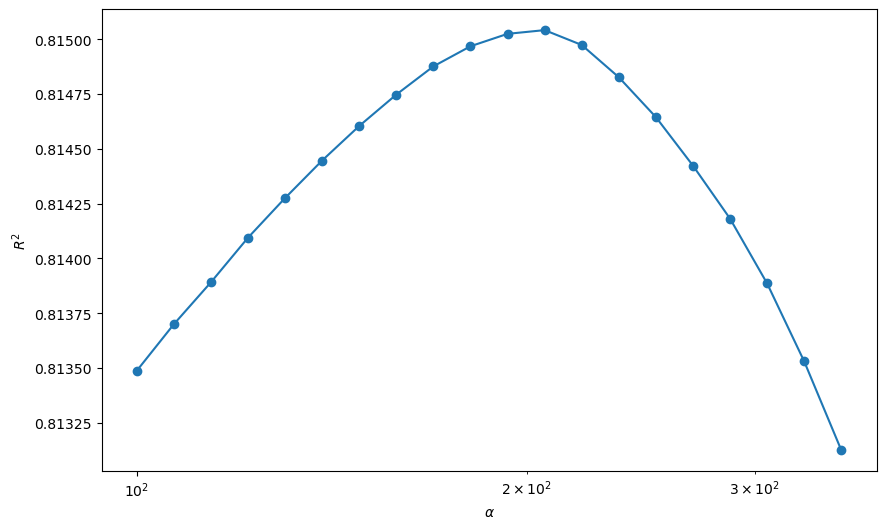

In [69]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

## Best value for alpha is around 205

## 4. Comparison between Lasso and Ridge regression

In [70]:
X = processed_df.drop('latest_price', axis=1)
y = processed_df.latest_price

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [73]:
las001 = Lasso(alpha = 205, max_iter=100000)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
las001.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = las001.predict(X_test_s)

# Calculating r2 score
print("r2 score for alpha = 205:", r2_score(y_pred, y_test))

# Part 3
print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las001.coef_!=0).sum())


r2 score for alpha = 205: 0.7956119614416979
Magnitude of Lasso coefficients: 177341.51375940177
Number of coeffients not equal to 0 for Lasso: 113


In [74]:
from sklearn.linear_model import Ridge

In [75]:
r = Ridge(alpha = 205)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
r.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = r.predict(X_test_s)

# Calculating r2 score
print("r2 score for alpha = 205:", r2_score(y_pred, y_test))

# Part 3
print('Magnitude of Ridge coefficients:', abs(r.coef_).sum())
print('Number of coeffients not equal to 0 for Ridge:', (r.coef_!=0).sum())


r2 score for alpha = 205: 0.7376737777276718
Magnitude of Ridge coefficients: 177835.73212283378
Number of coeffients not equal to 0 for Ridge: 164


# 4. Insights and key findings


## For this analysis, the best results are obtained for vanilla Linear Regression for the case scaling is not applied.

# 5. Next Steps


## Try the same analysis but with smaller number of features, so that the interpretability of the analysis is enhanced.